In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import auc

# Results

#### Comparison

In [32]:
# 
tech_nm = ['baseline 190 (100)', 'fabnet_corr 190 (100)', 'ms_resnet50_fabnet_vox_test 512 (150)']

folders = ['results/only_corr_0.1_100', 
           'results/fabnet_corr_100_190_0.1',
          'results_cosine/ms_resnet50_fabnet_vox_test_150']

pois = [ 'bo', 'bs', 'cb', 'dtrndm', 'ew', 'hc', 'jb', 'pb', 'br', 'kh']
fakes = ['diff', 'imposter', 'faceswap']

# read all the directories from the technique folders

res_dir = {}
for f in folders:
    res_dir[f] = [os.path.join(f, x) for x in os.listdir(f) if os.path.isdir(os.path.join(f, x))]
    
results = np.zeros((len(folders), len(pois), len(fakes)))

for fk in range(len(fakes)):
    
    for t in range(len(folders)):
        
        for poi in range(len(pois)):
            
            # go to the poi result folder
            cur_dirs = res_dir[folders[t]]
            cur_fldr = [x for x in cur_dirs if '_{}_'.format(pois[poi]) in x]
            assert len(cur_fldr) == 1, 'poi folder should be only one {} {}'.format(cur_dirs, pois[poi])
            cur_fldr = cur_fldr[0]
            
            # read the poi, fake result file
            cur_file = [x for x in os.listdir(cur_fldr) if x.endswith('_roc_data.csv') 
                         and fakes[fk] in x and x[:3] != 'fv_']
            
            if len(cur_file) == 0:
                #print('not found {} {} {}'.format(folders[t], pois[poi], fakes[fk]))
                results[t, poi, fk] = np.nan
                continue
            
            #compute AUC
            assert len(cur_file) == 1, 'result file should be only one'
            cur_file = cur_file[0]
            df = pd.read_csv(os.path.join(cur_fldr, cur_file))
            results[t, poi, fk] = auc(np.array(df['fpr']), np.array(df['tpr']))            

In [46]:
results_concat = np.hstack([results[0, :, :], results[1, :, :], results[2, :, :]])
results_df = pd.DataFrame(results_concat, columns=['baseline_diff', 'baseline_imposter', 'baseline_face_swap',
                                                  'fabnet corr diff', 'fabnet corr imposter', 'fabnet corr face_swap',
                                                  'fabnet metric diff', 'fabnet metric imposter', 'fabnet metric face_swap'], 
                         index=pois)

results_df = ((results_df * 100).round())/100
print(results_df)

        baseline_diff  baseline_imposter  baseline_face_swap  \
bo               0.92               0.88                0.84   
bs               0.94               0.79                0.75   
cb               0.99                NaN                 NaN   
dtrndm           0.92               0.90                0.83   
ew               0.96               0.98                0.92   
hc               0.84               0.87                0.87   
jb               0.81                NaN                 NaN   
pb               0.84                NaN                 NaN   
br               0.99                NaN                 NaN   
kh               0.84                NaN                 NaN   

        fabnet corr diff  fabnet corr imposter  fabnet corr face_swap  \
bo                  0.97                  0.95                   0.96   
bs                  0.99                  0.85                   0.89   
cb                  0.99                   NaN                    NaN   
dtr

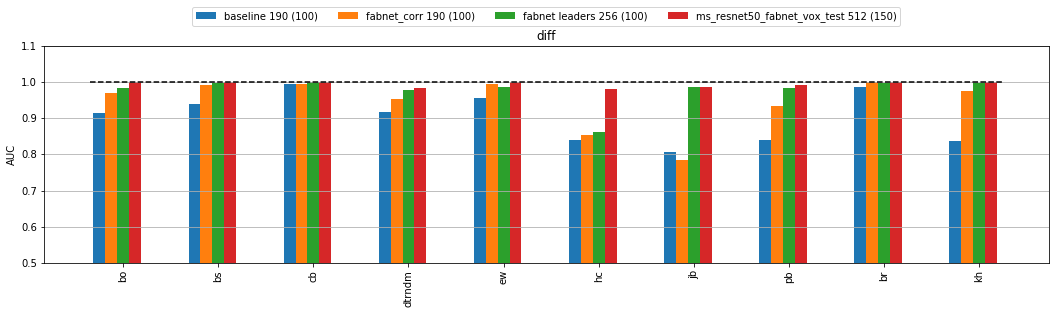

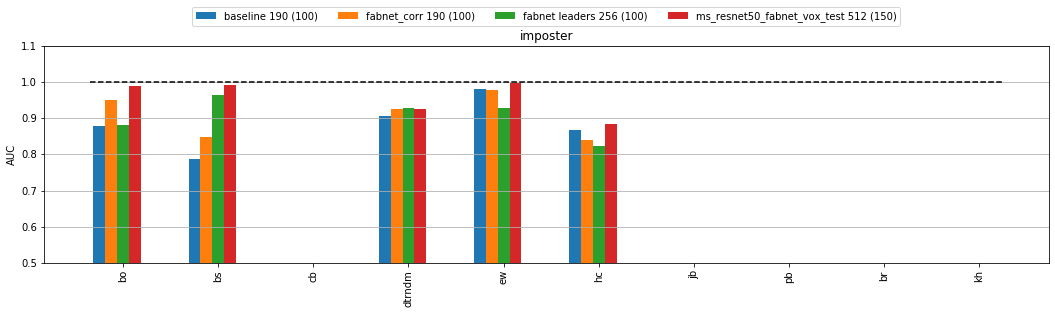

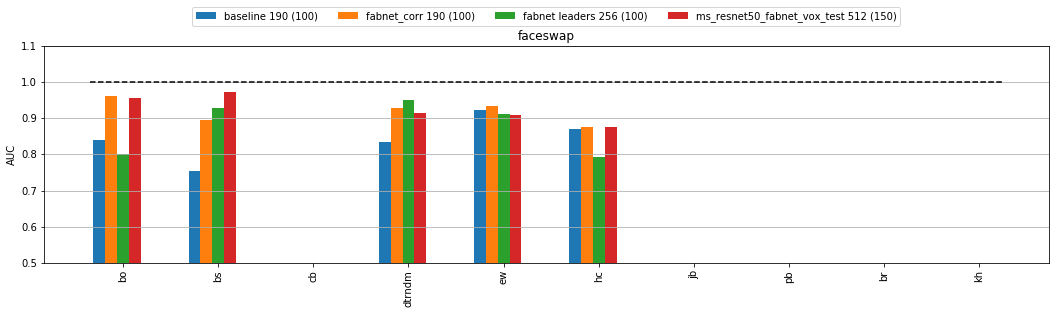

In [31]:
# visualize

# for each type of fake create a bar chart
# each bar graph number of pois are the groups
# each group has all the techniques
br_w = 0.5/len(folders)

for fk in range(len(fakes)):
    x_pos = np.arange(len(pois))
    fig, ax = plt.subplots(figsize=(18,4))
    plts = []
    
    for t in range(len(folders)):
        
        p = ax.bar(x_pos, results[t, :, fk], br_w, bottom=0)
        plts = plts + [p]
        x_pos = x_pos+br_w

    ax.set_title(fakes[fk])
    ax.set_xticks(x_pos-br_w*len(folders)/2)
    ax.set_xticklabels(pois, rotation=90)
    ax.set_ylim([0.5, 1.1])
    ax.set_ylabel('AUC')
    ax.plot([-0.1, 9.5], [1, 1], 'k--')
    ax.legend(plts, tech_nm, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(folders), fancybox=True, shadow=False)
    plt.grid(b=True, axis='y')
    plt.show()

### tsne visualization

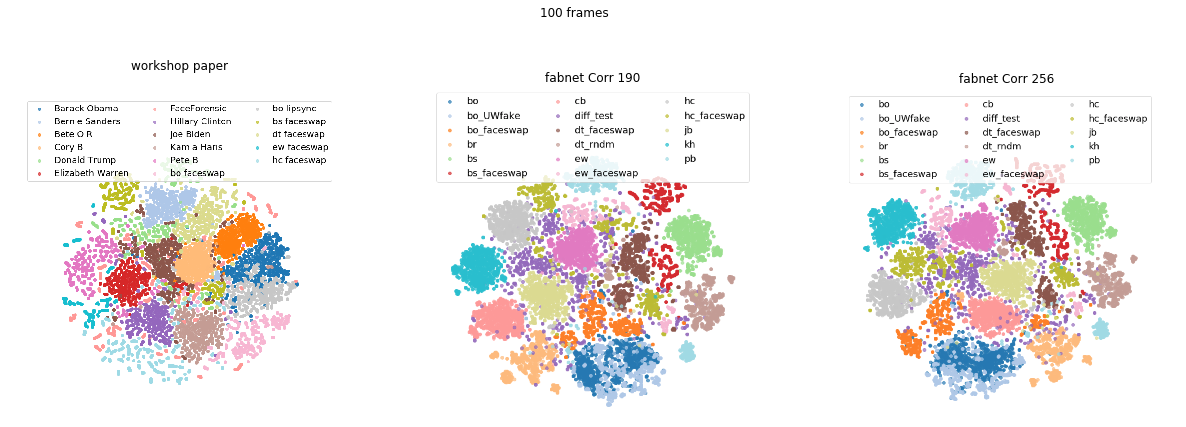

In [19]:
# 100 frames visualization
wp_100 = plt.imread('tsne_plots/only_cor_100.png') # CVPR workshop paper
aus_100 = plt.imread('tsne_plots/tsne_fabnet_corr190.png') # using 20 features directly
fabnet_100 = plt.imread('tsne_plots/tsne_fabnet_corr256.png') # using fabnet features
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
ax[0].imshow(wp_100); ax[0].set_title('workshop paper'); ax[0].axis('off')
ax[1].imshow(aus_100); ax[1].set_title('fabnet Corr 190'); ax[1].axis('off')
ax[2].imshow(fabnet_100); ax[2].set_title('fabnet Corr 256'); ax[2].axis('off')
plt.suptitle('100 frames')
plt.show()


In [ ]:
# feed in a 190 features 
# feed in the imposters